In [25]:
import trimesh

scene = trimesh.Scene()

# read /home/s94zalek_hpc/shape_matching/data/SURREAL_full/template/template.ply
mesh = trimesh.load_mesh('/home/s94zalek_hpc/shape_matching/data/SURREAL_full/template/template.ply')
# mesh.show()

In [27]:
# sum(mesh.area_faces)

1.7718802513328193

In [ ]:
scene.geometry.clear()

# simplify the mesh
mesh_simplified = mesh.simplify_quadric_decimation(int(len(mesh.faces) * 0.6))

# shift the vertices by 1 on x axis and add to the scene
mesh_simplified.vertices += [2, 0, 0]
scene.add_geometry(mesh_simplified)

mesh_orig_shifted = mesh.copy()
mesh_orig_shifted.vertices += [1, 0, 0]

scene.add_geometry(mesh_orig_shifted)
scene.add_geometry(trimesh.creation.axis())

scene.show()



In [ ]:
import igl
import numpy as np

# apply qslim to simplify the mesh
_, v, f, _, _ = igl.qslim(
    np.array(mesh.vertices),
    np.array(mesh.faces),
    int(len(mesh.faces) * 0.6))

mesh_qslim = trimesh.Trimesh(v + [3, 0, 0]
                             , f)
scene.add_geometry(mesh_qslim)


In [ ]:
scene.show()

In [ ]:
# read mesh /home/s94zalek_hpc/shape_matching/data/FAUST_r/off/tr_reg_000.off

mesh_faust = trimesh.load_mesh('/home/s94zalek_hpc/shape_matching/data/FAUST_r/off/tr_reg_000.off')

mesh_faust.vertices += [2, 0, 0]
# scene.add_geometry(mesh_faust)

# scene.show()

# Meshlab

In [2]:
import pymeshlab

ms = pymeshlab.MeshSet()

In [39]:
ms.clear()

ms.load_new_mesh('/home/s94zalek_hpc/shape_matching/data/SURREAL_full/template/template.ply')

v_before = ms.current_mesh().vertex_matrix()
f_before = ms.current_mesh().face_matrix()

ms.meshing_isotropic_explicit_remeshing(
    iterations=10,
    targetlen=pymeshlab.PercentageValue(0.5)
)
v_r = ms.current_mesh().vertex_matrix()
f_r = ms.current_mesh().face_matrix()

ms.meshing_decimation_quadric_edge_collapse(
    targetfacenum=int(len(f_before) * 0.2),
    # targetperc=0.7,
)
v_qec = ms.current_mesh().vertex_matrix()
f_qec = ms.current_mesh().face_matrix()


print('before', v_before.shape, f_before.shape)
print('after remesh', v_r.shape, f_r.shape)
print('after qec', v_qec.shape, f_qec.shape)

before (6890, 3) (13776, 3)
after remesh (20576, 3) (41148, 3)
after qec (1379, 3) (2754, 3)


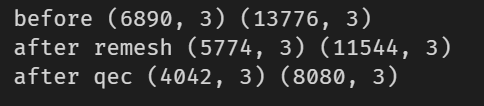

In [ ]:
import numpy as np

scene.geometry.clear()

mesh_before = trimesh.Trimesh(v_before + [1, 0, 0], f_before)
mesh_remeshed = trimesh.Trimesh(v_r + [2, 0, 0], f_r)
mesh_remeshed_simple = trimesh.Trimesh(v_qec + [3, 0, 0], f_qec)

scene.add_geometry(trimesh.creation.axis())

# scene.add_geometry(mesh_orig_shifted)
# scene.add_geometry(mesh_faust)

scene.add_geometry(mesh_before)
scene.add_geometry(mesh_remeshed)
scene.add_geometry(mesh_remeshed_simple)

scene.show()

In [ ]:
scene.geometry.clear()
# read and show /home/s94zalek_hpc/shape_matching/data_sign_training/train/SURREAL_train_remesh_10_0.75_rot_0_90_0_normal_True_noise_0.0_-0.05_0.05_lapl_mesh_scale_0.9_1.1/off/0008.off
mesh_gen = trimesh.load_mesh('/home/s94zalek_hpc/shape_matching/data_sign_training/train/SURREAL_train_remesh_iters_10_simplify_0.20_0.80_rot_0_90_0_normal_True_noise_0.0_-0.05_0.05_lapl_mesh_scale_0.9_1.1/off/0183.off')

print(mesh_gen.vertices.shape, mesh_gen.faces.shape)
scene.add_geometry(mesh_gen)

scene.show()

# Anisotropic mesh

In [33]:
mesh_anis = trimesh.load_mesh('/home/s94zalek_hpc/shape_matching/data/FAUST_a/off/tr_reg_080.off')
mesh_anis.show()

In [ ]:
mesh_anis = trimesh.load_mesh('/home/s94zalek_hpc/shape_matching/data/FAUST_a/off/tr_reg_080.off')
mesh_anis.vertices += [1, 0, 0]

# remesh the mesh
ms.clear()
# ms.load_new_mesh('/home/s94zalek_hpc/shape_matching/data/FAUST_a/off/tr_reg_080.off')

v_anis, f_anis = trimesh.remesh.subdivide_to_size(mesh_anis.vertices, mesh_anis.faces, max_edge=0.01)

ms.add_mesh(pymeshlab.Mesh(v_anis, f_anis))

ms.meshing_isotropic_explicit_remeshing(
    iterations=10,
    targetlen=pymeshlab.PercentageValue(3)
    # adaptive=True,
)
ms.meshing_decimation_quadric_edge_collapse(
    targetperc=0.7,
)
# ms.meshing_surface_subdivision_butterfly()
    # targetabstractminfacenum=len(ms.current_mesh().face_matrix()) * 0.5,
    # targetabstractmaxfacenum= 200

# ms.meshing_repair_non_manifold_vertices()
# ms.meshing_repair_non_manifold_edges(method=0)

# ms.compute_iso_parametrization()

# ms.generate_resampled_uniform_mesh(
#     cellsize=pymeshlab.PercentageValue(0.5)
# )

v_anis = ms.current_mesh().vertex_matrix()
f_anis = ms.current_mesh().face_matrix()

mesh_anis_remeshed = trimesh.Trimesh(v_anis + [2, 0, 0], f_anis)


print('before', mesh_anis.vertices.shape, mesh_anis.faces.shape)
print('after remesh', v_anis.shape, f_anis.shape)

scene.geometry.clear()

scene.add_geometry(trimesh.creation.axis())

scene.add_geometry(mesh_anis)
scene.add_geometry(mesh_anis_remeshed)
scene.show()

In [ ]:
ms.generate_convex_hull()
v_hull = ms.current_mesh().vertex_matrix()
f_hull = ms.current_mesh().face_matrix()

mesh_hull = trimesh.Trimesh(v_hull + [3, 0, 0], f_hull)

scene.geometry.clear()

scene.add_geometry(trimesh.creation.axis())
scene.add_geometry(mesh_anis)
scene.add_geometry(mesh_hull)

scene.show()

In [ ]:
from my_code.datasets.surreal_dataset_3dc import TemplateSurrealDataset3DC

augmentations = {
    'remesh': {
        'n_remesh_iters': 10,
        'simplify_percent_min': 0.5,
        'simplify_percent_max': 1.0,
    }
}

dataset_aug = TemplateSurrealDataset3DC(
    # shape_path=f'/home/s94zalek_hpc/3D-CODED/data/mmap_datas_surreal_train.pth',
    shape_path='/lustre/mlnvme/data/s94zalek_hpc-shape_matching/mmap_datas_surreal_train.pth',
    num_evecs=128,
    use_cuda=False,
    cache_lb_dir=None,
    return_evecs=True,
    mmap=True,
    augmentations=augmentations
) 
dataset_orig = TemplateSurrealDataset3DC(
    # shape_path=f'/home/s94zalek_hpc/3D-CODED/data/mmap_datas_surreal_train.pth',
    shape_path='/lustre/mlnvme/data/s94zalek_hpc-shape_matching/mmap_datas_surreal_train.pth',
    num_evecs=128,
    use_cuda=False,
    cache_lb_dir=None,
    return_evecs=True,
    mmap=True,
    augmentations=None
) 

In [ ]:
import torch

data_0 = dataset_aug[1990]
mesh_0 = trimesh.Trimesh(data_0['second']['verts'], data_0['second']['faces'])

data_0_orig = dataset_orig[1990]
mesh_0_orig = trimesh.Trimesh(data_0_orig['second']['verts'] + torch.tensor([0.1, 0, 0]), data_0_orig['second']['faces'])

data_1 = dataset_aug[16991]
mesh_1 = trimesh.Trimesh(data_1['second']['verts'] + torch.tensor([1, 0, 0]), data_1['second']['faces'])

data_1_orig = dataset_orig[16991]
mesh_1_orig = trimesh.Trimesh(data_1_orig['second']['verts'] + torch.tensor([1.1, 0, 0]), data_1_orig['second']['faces'])

scene.geometry.clear()

scene.add_geometry(trimesh.creation.axis())
scene.add_geometry(mesh_0)
scene.add_geometry(mesh_0_orig)
scene.add_geometry(mesh_1)
scene.add_geometry(mesh_1_orig)

scene.show()


In [ ]:
import utils.fmap_util as fmap_util

p2p = fmap_util.nn_query(
    torch.tensor(mesh_1.vertices), 
    torch.tensor(mesh_1_orig.vertices),
    )
p2p

In [ ]:
import my_code.utils.plotting_utils as plotting_utils

# scene.geometry.clear()
# scene = plotting_utils.plot_p2p_map(
#     scene, 
#     mesh_1.vertices, mesh_1.faces, 
#     mesh_1_orig.vertices, mesh_1_orig.faces,
#     p2p)
    
# scene.show()

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

plotting_utils.plot_Cxy(fig, axs[0], data_1['second']['C_gt_xy'],
                        'with aug', 0, 32, show_grid=False, show_colorbar=False)
plotting_utils.plot_Cxy(fig, axs[1], data_1_orig['second']['C_gt_xy'],
                        'without aug', 0, 32, show_grid=False, show_colorbar=False)
plotting_utils.plot_Cxy(fig, axs[2], data_1_orig['second']['C_gt_xy'].abs() - data_1['second']['C_gt_xy'].abs(),
                        'without aug', 0, 32, show_grid=False, show_colorbar=False)
plt.show()

# Anisotropic remeshing 

In [3]:
import pymeshlab

ms = pymeshlab.MeshSet()

In [29]:
ms.clear()
ms.load_new_mesh('/home/s94zalek_hpc/shape_matching/data/SURREAL_full/template/template.ply')

In [30]:
v_before = ms.current_mesh().vertex_matrix()
f_before = ms.current_mesh().face_matrix()

ms.meshing_isotropic_explicit_remeshing(
    iterations=10,
    targetlen=pymeshlab.PercentageValue(3),
)
v_r = ms.current_mesh().vertex_matrix()
f_r = ms.current_mesh().face_matrix()

print('before', v_before.shape, f_before.shape)
print('after', v_r.shape, f_r.shape)

before (6890, 3) (13776, 3)
after (1445, 3) (2886, 3)


In [31]:
import numpy as np

ms.set_selection_none()

target_perc = 0.5

mesh_r = trimesh.Trimesh(v_r, f_r)
area_faces = mesh_r.area_faces
total_area_faces = area_faces.sum()

# choose a random face, with probability proportional to its area
rand_idx = np.random.choice(len(area_faces), p=area_faces / total_area_faces)

print(f"Selected face {rand_idx} with area {area_faces[rand_idx] * 100:.4f}%")

ms.compute_selection_by_condition_per_face(
    condselect= f'(fi == {rand_idx})'
)
# print(sum(ms.current_mesh().face_selection_array()))
for dil_iter in range(100):
    if sum(ms.current_mesh().face_selection_array()) >= len(ms.current_mesh().face_matrix()) * target_perc:
        print(dil_iter)
        break
    # selected_area = sum(area_faces[ms.current_mesh().face_selection_array()])
    # if selected_area >= total_area_faces * target_perc:
    #     print(f"Iteration {dil_iter}, selected area {selected_area / total_area_faces * 100:.2f}%")
    #     break
    ms.apply_selection_dilatation()

selected_faces = ms.current_mesh().face_selection_array()
print(f"Selected {sum(ms.current_mesh().face_selection_array())} faces out of {len(ms.current_mesh().face_matrix())}")
    
ms.meshing_decimation_quadric_edge_collapse(
    targetfacenum=int(sum(ms.current_mesh().face_selection_array()) * 0.2),
    # targetperc=0.5,
    selected=True
)

v_qec = ms.current_mesh().vertex_matrix()
f_qec = ms.current_mesh().face_matrix()

print('before', v_r.shape, f_r.shape)
print('after remesh with anisotropy', v_qec.shape, f_qec.shape)


Selected face 2250 with area 0.1400%
25
Selected 1477 faces out of 2886
before (1445, 3) (2886, 3)
after remesh with anisotropy (854, 3) (1704, 3)


In [231]:
import importlib
importlib.reload(remesh)

<module 'my_code.sign_canonicalization.remesh' from '/home/s94zalek_hpc/shape_matching/my_code/sign_canonicalization/remesh.py'>

In [44]:
import my_code.sign_canonicalization.remesh as remesh

v_qec, f_qec, v_r, f_r, selected_faces = remesh.remesh_simplify_anis(
    verts=v_before,
    faces=f_before,
    n_remesh_iters=10,
    fraction_to_simplify=0.5,
    simplify_strength=0.2,
    weighted_by='face_count',
)

In [32]:
import torch

mesh_before = trimesh.Trimesh(v_before + [1, 0, 0], f_before)
mesh_remesh = trimesh.Trimesh(v_r + [2, 0, 0], f_r)
mesh_after = trimesh.Trimesh(v_qec + [3, 0, 0], f_qec)
# mesh_after = trimesh.Trimesh(v_qec + torch.tensor([3, 0, 0]), f_qec)

# on mesh_remesh, highlight selected_faces
mesh_remesh.visual.face_colors = np.array([[0, 0, 0, 255]] * len(mesh_remesh.faces))
mesh_remesh.visual.face_colors[selected_faces] = [0, 255, 0, 255]


scene.geometry.clear()

scene.add_geometry(trimesh.creation.axis())
scene.add_geometry(mesh_before)
scene.add_geometry(mesh_remesh)
scene.add_geometry(mesh_after)

scene.show()

In [5]:
# base_dir = '/home/s94zalek_hpc/shape_matching/data_sign_training/train/SURREAL_anisRemesh_0.25/off'
base_dir = '/home/s94zalek_hpc/shape_matching/data/FAUST_a/off'

In [ ]:
# read 5 random meshes from the directory
import os
import numpy as np

scene.geometry.clear()

meshes = []
for i in range(5):
    file = np.random.choice(os.listdir(base_dir), replace=False)
    mesh = trimesh.load_mesh(os.path.join(base_dir, file))
    mesh.vertices += [i, 0, 0]
    
    edges_len = mesh.edges_unique_length
    break
    
    scene.add_geometry(mesh)
    
scene.show()
    

# Edge lengths

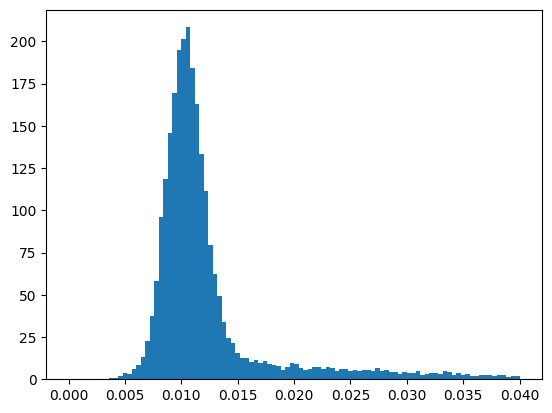

In [34]:
import matplotlib.pyplot as plt
# plt.hist(edges_len, bins=100)
# plot cumulative probability density function
plt.hist(edges_len, bins=100, cumulative=False, range=(0, 0.04), density=True)


plt.show()

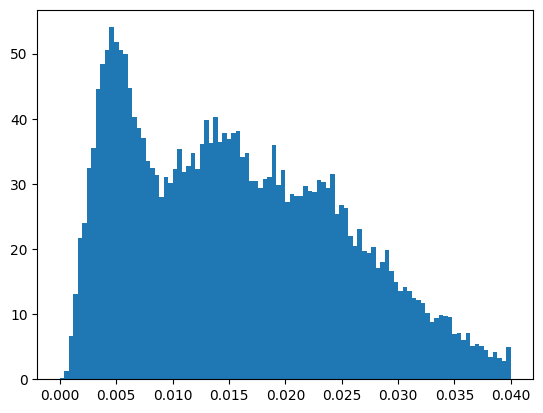

In [35]:
# read '/home/s94zalek_hpc/shape_matching/data/SURREAL_full/template/template.ply'

mesh_template = trimesh.load_mesh('/home/s94zalek_hpc/shape_matching/data/SURREAL_full/template/template.ply')

edges_len_template = mesh_template.edges_unique_length

plt.hist(edges_len_template, bins=100, cumulative=False, range=(0, 0.04), density=True)

plt.show()

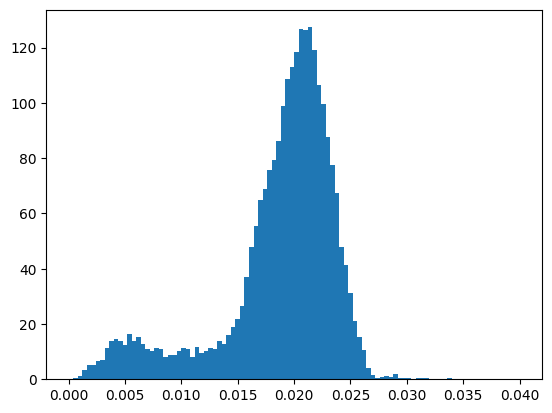

In [24]:
import matplotlib.pyplot as plt

mesh_remeshed = trimesh.Trimesh(v_r, f_r)
edges_len_remeshed = mesh_remeshed.edges_unique_length

plt.hist(edges_len_remeshed, bins=100, cumulative=False, range=(0, 0.04), density=True)

plt.show()

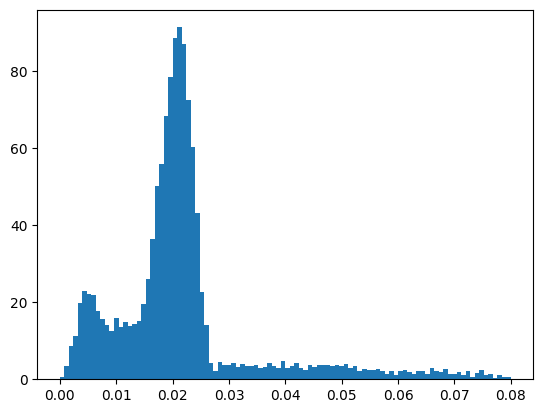

In [23]:
mesh_remeshed_simplified = trimesh.Trimesh(v_qec, f_qec)
edges_len_remeshed_simplified = mesh_remeshed_simplified.edges_unique_length

plt.hist(edges_len_remeshed_simplified, bins=100, cumulative=False, range=(0, 0.08), density=True)

plt.show()